# S17 T02: Base de dades MySQL

In [8]:
import mysql.connector
import random
import datetime
import pandas as pd
import matplotlib.pyplot as plt

## Nivell 1
- Exercici 1

Crea una base de dades relacionals senzilla utilitzant MySQL(https://www.mysql.com/) i connecta-la a Python

In [9]:
pwd = input('password: ')
host = "localhost"
user = "root"

In [10]:
mydb = mysql.connector.connect(
    host = host,
    user = user,
    password = pwd)

print(mydb)

In [11]:
mycursor = mydb.cursor()
sql = "SHOW DATABASES"
mycursor.execute(sql)
for x in mycursor: 
    print(x)

('BD_Botiga',)
('information_schema',)
('mysql',)
('NBA',)
('performance_schema',)
('sys',)


## Nivell 2

- Exercici 2

Mostra que pots carregar algunes consultes senzilles a un Pandas Dataframe.

In [12]:
"""EL PRIMER QUE FAREM SERÁ OMPLIR LES TAULES TRANSACCIÓ I LINEA_TRANSSACCIÓ AMB DADES GENERADES ALEATORIAMENT"""

# Mostrem els noms dels atributs de cada una de les taules
name = 'TRANSACCIO'
sql = f"SELECT COLUMN_NAME FROM INFORMATION_SCHEMA.COLUMNS WHERE TABLE_NAME = '{name}' ORDER BY ORDINAL_POSITION"
mycursor.execute(sql)
myresult = mycursor.fetchall()
print(name, ":")
for x in myresult:
    print(x)
print()

name = 'LINEA_TRANSACCIO'
sql = f"SELECT COLUMN_NAME FROM INFORMATION_SCHEMA.COLUMNS WHERE TABLE_NAME = '{name}' ORDER BY ORDINAL_POSITION"
mycursor.execute(sql)
myresult = mycursor.fetchall()
print(name, ":")
for x in myresult:
    print(x)

TRANSACCIO :
('TransID',)
('TRANS_TIPUS_TransTipusID',)
('Data',)
('TransSubtotal',)
('CLIENT_CodiClient',)
('ESTABLIMENT_CodiEstab',)
('TREBALLADOR_CodiTreb',)
('PAGAMENT_PagamentID',)

LINEA_TRANSACCIO :
('TRANSACCIO_TransID',)
('TRANSACCIO_TRANS_TIPUS_TransTipusID',)
('PRODUCTE_ProductID',)
('Quantitat',)
('Descompte',)
('LienaSubtotal',)


In [13]:
# Implementem una funcio que generi datetimes aleatoris per agrear al camp "Data"
def random_date(start, end):
    """ This function will return a random datetime between two datetime objects. """
    delta = end - start
    int_delta = (delta.days * 24 * 60 * 60) + delta.seconds
    random_second = random.randrange(int_delta)
    return start + datetime.timedelta(seconds=random_second)

d1 = datetime.datetime(2018, 1,1)
d2 = datetime.datetime.now()

In [14]:

mycursor.execute('USE BD_Botiga')
mycursor.execute("DELETE FROM LINEA_TRANSACCIO") #Esborrem totes les dades de la taula LINEA_TRANSACIO per que no hi hagi conflice amb el PK.
print(mycursor.rowcount, "records deleted on LINEA_TRANSACCIO") # 
mycursor.execute("DELETE FROM TRANSACCIO") # Esborrem totes les dades de la taula TRANSACCIO per que no hi hagi conflice amb el PK.
print(mycursor.rowcount, "records deleted on TRANSACCIO")
print()


# GENEREM LES QUERIES PER A CADA TAULA
sql = "INSERT INTO TRANSACCIO (TransID, TRANS_TIPUS_TransTipusID, Data, CLIENT_CodiClient, ESTABLIMENT_CodiEstab, TREBALLADOR_CodiTreb, PAGAMENT_PagamentID) VALUES(%s,%s,%s,%s,%s,%s,%s)"
sql2 = "INSERT INTO LINEA_TRANSACCIO (TRANSACCIO_TransID, TRANSACCIO_TRANS_TIPUS_TransTipusID, PRODUCTE_ProductID, Quantitat, Descompte) VALUES(%s,%s,%s,%s,%s)"

# DEFINIM UN LOOP PERQUE AGREGI LES TRANSACCIONS i LES LINEAS DE TRANSACCIÓ ALEATORIES
for i in range(20):
    # Assignem un valor a cada atribut
    TransID = i+1
    TRANS_TIPUS_TransTipusID = 1
    Data = random_date(d1,d2).strftime("%Y/%m/%d %H:%M:%S") # Cridem la funció de dates aleatories
    CLIENT_CodiClient = random.randint(1,23)
    ESTABLIMENT_CodiEstab = random.randint(1,3)
    TREBALLADOR_CodiTreb = random.randint(4,13)
    PAGAMENT_PAGAMENTID = random.randint(1,5)
    val = (TransID, TRANS_TIPUS_TransTipusID, Data, CLIENT_CodiClient, ESTABLIMENT_CodiEstab, TREBALLADOR_CodiTreb, PAGAMENT_PAGAMENTID) #afegim totes les dades a un tupple 
    mycursor.execute(sql, val) #Executem la Queri amb les dades afegides al tupple
    print("Transacció: ", val) 
    
    # PER A CADA TRANSACCIÓ AFEGIM UN NUMERO DE LINEAS ALEATORI:
    for t in range(random.randint(1,5)): #definim un maxim de 5 lienas per transacció
        TRANSACCIO_TransID = TransID # Al ser un PK compost cridem als PK de la taula TRANSACCIO
        TRANSACCIO_TRANS_TIPUS_TransTipusID = TRANS_TIPUS_TransTipusID # Al ser un PK compost cridem als PK de la taula TRANSACCIO
        PRODUCTE_ProductID = random.randint(1,28)
        Quantitat = random.randint(1,5)
        Descompte = random.randint(0,15)
        val2 = (TRANSACCIO_TransID,TRANSACCIO_TRANS_TIPUS_TransTipusID,PRODUCTE_ProductID,Quantitat,Descompte)
        mycursor.execute(sql2, val2) #Executem la Queri amb les dades afegides al tupple
        mydb.commit() #Fem commit perque els canvis quedin registrats a la BDD
        print("Linea: ", val2)
    print()

55 records deleted on LINEA_TRANSACCIO
20 records deleted on TRANSACCIO

Transacció:  (1, 1, '2020/05/22 12:27:45', 2, 3, 8, 5)
Linea:  (1, 1, 20, 2, 6)
Linea:  (1, 1, 14, 4, 9)

Transacció:  (2, 1, '2019/07/16 07:41:12', 4, 2, 13, 1)
Linea:  (2, 1, 10, 5, 6)

Transacció:  (3, 1, '2020/10/04 01:36:54', 12, 1, 9, 4)
Linea:  (3, 1, 23, 3, 3)
Linea:  (3, 1, 20, 2, 12)
Linea:  (3, 1, 4, 3, 12)

Transacció:  (4, 1, '2018/07/03 00:06:10', 19, 3, 8, 5)
Linea:  (4, 1, 18, 1, 13)

Transacció:  (5, 1, '2020/02/26 11:05:27', 20, 1, 4, 4)
Linea:  (5, 1, 25, 2, 13)
Linea:  (5, 1, 7, 4, 2)

Transacció:  (6, 1, '2018/06/09 20:35:58', 21, 3, 7, 4)
Linea:  (6, 1, 23, 3, 1)
Linea:  (6, 1, 9, 4, 8)
Linea:  (6, 1, 10, 1, 7)

Transacció:  (7, 1, '2020/03/08 15:52:48', 12, 1, 11, 3)
Linea:  (7, 1, 11, 5, 6)
Linea:  (7, 1, 3, 1, 10)
Linea:  (7, 1, 4, 2, 2)
Linea:  (7, 1, 24, 3, 13)
Linea:  (7, 1, 14, 1, 12)

Transacció:  (8, 1, '2020/01/21 18:15:52', 20, 1, 4, 3)
Linea:  (8, 1, 11, 5, 14)
Linea:  (8, 1, 5, 1

In [15]:
"""UN COP INTRODUIDES LES DADES FEM LA CONSULTA A LA BDD"""

sql = """
SELECT t.TransID, 
trt.TransTipusNom AS TransTipus,
pr.ProductNom,
pr.ProductPreu,
tp.TipusNom AS PrductType, 
lt.Quantitat, 
lt.Descompte,
(lt.Quantitat * pr.ProductPreu - (lt.Quantitat * ProductPreu / 100 * lt.Descompte)) AS Subtotal,
t.Data, 
CONCAT (ps.Nom,' ',ps.Cognoms) AS Client,
e.NomEstab AS Establiment, 
CONCAT (ps2.Nom,' ', ps2.Cognoms) AS Venedor, 
p.PagamentNom AS MetodePagament

FROM LINEA_TRANSACCIO lt
JOIN TRANSACCIO t ON lt.TRANSACCIO_TransID = t.TransID AND lt.TRANSACCIO_TRANS_TIPUS_TransTipusID = TRANS_TIPUS_TransTipusID
JOIN TRANS_TIPUS trt ON lt.TRANSACCIO_TRANS_TIPUS_TransTipusID = trt.TransTipusID
JOIN PRODUCTE pr ON lt.PRODUCTE_ProductID = pr.ProductID
JOIN TIPUS_PRODUCTE tp  ON tp.TipusID = pr.TIPUS_PRODUCTE_TipusID
JOIN CLIENT c ON t.CLIENT_CodiClient = c.CodiClient
JOIN PERSONA ps ON ps.DNI = c.PERSONA_DNI
JOIN TREBALLADOR tr ON t.TREBALLADOR_CodiTreb = tr.CodiTreb
JOIN PERSONA ps2 ON ps2.DNI = tr.PERSONA_DNI
JOIN ESTABLIMENT e ON t.ESTABLIMENT_CodiEstab = e.CodiEstab
JOIN PAGAMENT p ON p.PagamentID = t.PAGAMENT_PagamentID
"""

In [16]:
""" EXECUTEM LA CONSULTA I LA RESPOSTA LA CONVERTIM EN UN DATAFRAME """

mydb = mysql.connector.connect(
    host = host,
    user = user,
    password = pwd, 
    database = 'BD_Botiga')
    
sales = pd.read_sql(sql, con=mydb) #Aquest metode genera el dataframe indicant el statement SQL i el conector

In [17]:
sales.head(10)

,TransID,TransTipus,ProductNom,ProductPreu,PrductType,Quantitat,Descompte,Subtotal,Data,Client,Establiment,Venedor,MetodePagament
0,18,Venta,PANTALONS HOME,25,Textil Home,2,3,48.5000,2020-02-18 08:42:35,Marina Albert Esteve,MONTIGALA,Manuel Sirvent Malloras,BankTransfer
1,18,Venta,LLEIXIU,0.89,Drogueria,5,8,4.0940,2020-02-18 08:42:35,Marina Albert Esteve,MONTIGALA,Manuel Sirvent Malloras,BankTransfer
2,18,Venta,BLUSA DONA,30,Textil Dona,3,5,85.5000,2020-02-18 08:42:35,Marina Albert Esteve,MONTIGALA,Manuel Sirvent Malloras,BankTransfer
3,18,Venta,ENCIAM KG,1,Frescos Alim,4,1,3.9600,2020-02-18 08:42:35,Marina Albert Esteve,MONTIGALA,Manuel Sirvent Malloras,BankTransfer
4,17,Venta,PANTALONS HOME,25,Textil Home,1,15,21.2500,2020-10-13 17:07:56,Adria Guerrero Costa,MONTIGALA,Axel Perez Perez,Credit
5,17,Venta,SAMARRETA DONA,15,Textil Dona,5,1,74.2500,2020-10-13 17:07:56,Adria Guerrero Costa,MONTIGALA,Axel Perez Perez,Credit
6,17,Venta,ENCIAM KG,1,Frescos Alim,3,4,2.8800,2020-10-13 17:07:56,Adria Guerrero Costa,MONTIGALA,Axel Perez Perez,Credit
7,17,Venta,PERES KG,1.6,Frescos Alim,2,15,2.7200,2020-10-13 17:07:56,Adria Guerrero Costa,MONTIGALA,Axel Perez Perez,Credit
8,15,Venta,VALERIANA 12U,9.99,Parafarmacia,2,14,17.1828,2020-09-17 12:33:47,Robert Del Toro,MONTIGALA,Manuel Sirvent Malloras,Paypal
9,15,Venta,SAMARRETA HOME,20,Textil Home,3,6,56.4000,2020-09-17 12:33:47,Robert Del Toro,MONTIGALA,Manuel Sirvent Malloras,Paypal


## Nivell 3
- Exercici 3

Genera algun gràfic que resumeixi les dades. 

In [18]:
# Manipulem el dataframe per obtenir les dades ordenades per com les volem respresentar.

pie = sales[['Establiment','Venedor', 'Subtotal', 'MetodePagament']].groupby(['Establiment','Venedor','MetodePagament']).aggregate(sum)
pie = pie.reset_index()
pie2 = pie.pivot_table('Subtotal', ['Establiment','Venedor','MetodePagament'])
pie2

Subtotal
Establiment   Venedor                  MetodePagament           
GLORIES       Adria Guerrero Costa     BankTransfer      10.7570
                                       Credit            79.3006
              Jose Perez Vazquez       BankTransfer     371.4265
                                       Credit           136.2075
              Rebeca Gomez Tallarin    Debit             12.6000
                                       Paypal            79.5948
LA MAQUINISTA Adria Guerrero Costa     Efectiu         1932.5900
              Marina Albert Esteve     Debit            805.9302
              Silvia Cantarero Gimenez Efectiu           11.7500
MONTIGALA     Adria Guerrero Costa     BankTransfer     204.1780
                                       Credit            57.3898
                                       Debit            191.3895
                                       Paypal           154.8000
              Axel Perez Perez         Credit           101.1000
              Jose Perez Vazquez       Credit           142.7051
              Manuel Sirvent Malloras  BankTransfer     283.0924
                                       Paypal            73.5828

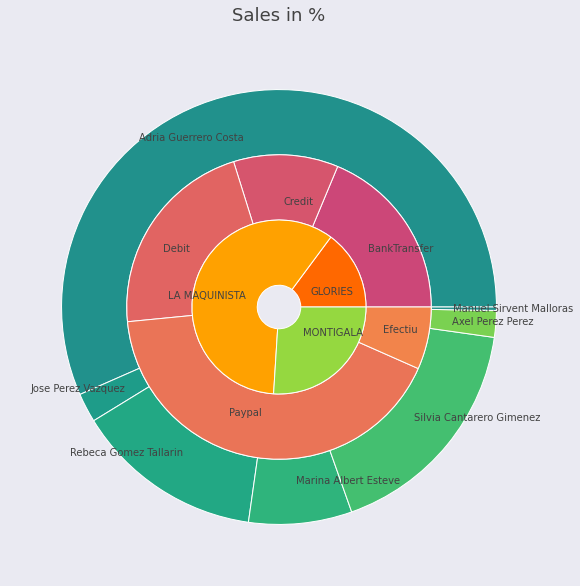

In [40]:
# Definm les propietats del grafic
facecolor = '#eaeaf2'
font_color = '#424242'
hfont = {'fontname':'Calibri'}

a,b,c,= [plt.cm.autumn,plt.cm.plasma, plt.cm.viridis]
inner_colors = [a(.41), a(.63), c(.84)]
mid_colors = [b(.50),b(.55),b(.60),b(.65),b(.70),b(.75)]
outer_colors = [c(.50),c(.55),c(.60),c(.65),c(.70),c(.80)]

labels1 = pie['Establiment'].unique()
labels3 = pie['Venedor'].unique()
labels2 = pie['MetodePagament'].unique()
size = 0.3

#Definim les dades que entraran al grafic
vals = pie2.groupby('Establiment')['Subtotal'].sum()
vals2 = pie2.groupby('MetodePagament')['Subtotal'].sum()
vals3 = pie2.groupby('Venedor')['Subtotal'].sum()

# Creem la figura i els subplots
fig, ax = plt.subplots(figsize=(10,10), facecolor=facecolor)

#Generem els grafics de pastis
ax.pie(vals3, 
       radius=1, 
       labels=labels3,
       colors=outer_colors,
       textprops={'color':font_color},
       wedgeprops=dict(width=size, edgecolor='w'),
       labeldistance=0.8)

ax.pie(vals2, 
       radius=1-size,
       labels=labels2, # size=0.3
       colors=mid_colors,
       textprops={'color':font_color},
       wedgeprops=dict(width=size, edgecolor='w'),
       labeldistance=0.7)

ax.pie(vals, 
       radius=1-2*size, # size=0.3
       colors=inner_colors,
       labels=labels1,
       textprops={'color':font_color},
       wedgeprops=dict(width=size, edgecolor='w'),
       labeldistance=0.4)

ax.set_title('Sales in %', fontsize=18, pad=15, color=font_color, **hfont)

#Plotegem el grafic
plt.show()   